# Models

In [146]:
import seaborn
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import rdMolDescriptors
import molvs
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib
import math

In [4]:
data = pd.read_csv("ar_ligands.csv")

In [5]:
data

,Canonical Smiles,Standard Type,Standard Value,Standard Units,pChEMBL Value,#Ro5 Violations,Molecular Weight,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,ALogP
0,Oc1ccccc1c2ccc(C#N)c(c2)C(F)(F)F,IC50,0.02,nM,10.70,0,263.22,NaN,NaN,NaN,NaN,3.95
1,CCC(C)N(C)c1cc(c(cn1)C#N)C(F)(F)F,IC50,7.00,nM,8.15,0,257.26,31.70,0.62,4.94,20.43,3.21
2,CC1(C)NC(=O)N(C1=O)c2ccc(C#N)c(c2)C(F)(F)F,IC50,6.00,nM,8.22,0,297.24,27.66,0.53,5.81,11.23,2.41
3,CC1CCNc2cc3OC(=O)C=C(c3cc12)C(F)(F)F,IC50,1.00,nM,9.00,0,283.25,31.77,0.61,5.27,21.31,3.73
4,[O-][N+](=O)c1ccc(NC(CC(=O)c2ccc(Cl)cc2)c3occc...,IC50,2.90,nM,8.54,1,370.79,23.03,0.45,3.27,10.00,5.27
5,CC[C@H]1C[C@]2(C)[C@@H](O)CCC2C3CCC4=CC(=O)CCC...,IC50,2.00,nM,8.70,0,300.44,28.95,0.54,4.51,23.32,4.19
6,CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[...,IC50,2.20,nM,8.66,1,429.60,20.15,0.37,3.25,21.36,5.41
7,CCCOC(=O)N1C[C@@]2(C)O[C@@](C)(C1)[C@H]3[C@@H]...,IC50,9.30,nM,8.03,0,465.43,NaN,NaN,NaN,NaN,3.09
8,C[C@](O)(COc1ccc(cc1F)C#N)C(=O)N2CCc3c(cccc23)C#N,IC50,3.20,nM,8.49,0,365.36,23.25,0.43,6.20,8.73,2.29
9,C[C@](O)(COc1ccc(Br)cc1)C(=O)N2CCc3c(cccc23)C#N,IC50,2.40,nM,8.62,0,401.26,21.48,0.47,5.58,11.72,3.04


In [7]:
data[["Canonical Smiles", "pChEMBL Value"]]

,Canonical Smiles,pChEMBL Value
0,Oc1ccccc1c2ccc(C#N)c(c2)C(F)(F)F,10.70
1,CCC(C)N(C)c1cc(c(cn1)C#N)C(F)(F)F,8.15
2,CC1(C)NC(=O)N(C1=O)c2ccc(C#N)c(c2)C(F)(F)F,8.22
3,CC1CCNc2cc3OC(=O)C=C(c3cc12)C(F)(F)F,9.00
4,[O-][N+](=O)c1ccc(NC(CC(=O)c2ccc(Cl)cc2)c3occc...,8.54
5,CC[C@H]1C[C@]2(C)[C@@H](O)CCC2C3CCC4=CC(=O)CCC...,8.70
6,CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[...,8.66
7,CCCOC(=O)N1C[C@@]2(C)O[C@@](C)(C1)[C@H]3[C@@H]...,8.03
8,C[C@](O)(COc1ccc(cc1F)C#N)C(=O)N2CCc3c(cccc23)C#N,8.49
9,C[C@](O)(COc1ccc(Br)cc1)C(=O)N2CCc3c(cccc23)C#N,8.62


In [36]:
data["Molecule"] = [Chem.MolFromSmiles(mol) for mol in data["Canonical Smiles"]]

In [147]:
data["FP2"] = [Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in data["Molecule"]]
data["MQN"] = [rdMolDescriptors.MQNs_(mol) for mol in data["Molecule"]]

In [148]:
train, test = train_test_split(data) #75/25

## Model pro FP

In [186]:
rfr = RandomForestRegressor(n_estimators=25, max_depth=7)
rfr.fit(list(train["FP2"]), list(train["pChEMBL Value"]))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [187]:
test["Predicted value"] = rfr.predict(list(test["FP2"]))

/home/anna/miniconda2/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
test

,Canonical Smiles,Standard Type,Standard Value,Standard Units,pChEMBL Value,#Ro5 Violations,Molecular Weight,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,ALogP,Molecule,FP2,MQN,Predicted value
106,N#Cc1ccc(N2CCCC2)c3ccccc13,IC50,2.50,nM,8.60,0,222.29,38.70,0.69,5.29,31.82,3.31,<rdkit.Chem.rdchem.Mol object at 0x7f17acd156c0>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[15, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 17, 2, 0, 1...",8.202300
119,C[C@]12CCC3C(CCC4=CC(=O)CCC34)C1C5CC5[C@@]26CC...,IC50,6.00,nM,8.22,0,340.46,24.15,0.45,4.16,18.96,4.06,<rdkit.Chem.rdchem.Mol object at 0x7f17acc543a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[22, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 25, 1, 2, 0...",8.323758
79,Cc1c(C#N)c(c(C)n1Cc2ccccc2)c3ccc(cc3)C#N,IC50,1.40,nM,8.85,0,311.39,28.43,0.50,4.29,16.86,4.56,<rdkit.Chem.rdchem.Mol object at 0x7f17acc42d50>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[21, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 24, 7, 0, 2...",8.257300
69,CC1=CC(=O)Nc2ccc3c(COc4cccc(CO)c34)c12,IC50,0.30,nM,9.52,0,293.32,32.47,0.59,6.63,15.28,2.89,<rdkit.Chem.rdchem.Mol object at 0x7f17ae24ae90>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[18, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 22, 3, 1, 0...",8.620539
19,FC(F)(F)C1CCNc2cc3OC(=O)C=C(c3cc12)C(F)(F)F,IC50,2.00,nM,8.70,0,337.22,25.80,0.52,4.43,20.59,4.27,<rdkit.Chem.rdchem.Mol object at 0x7f17acd19440>,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[14, 6, 0, 0, 0, 0, 0, 0, 1, 1, 1, 23, 8, 1, 0...",8.613300
75,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@]34C)[C@...,IC50,4.27,nM,8.37,0,288.43,29.02,0.54,4.49,22.44,3.88,<rdkit.Chem.rdchem.Mol object at 0x7f17acc2cf80>,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[19, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 21, 3, 1, 0...",8.483611
110,C[C@H]1[C@H](CCN1c2ccc(C#N)c3ccccc23)C(C)(C)O,IC50,1.40,nM,8.85,0,294.40,30.07,0.55,5.15,18.73,3.70,<rdkit.Chem.rdchem.Mol object at 0x7f17acc31b70>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[19, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 22, 7, 0, 1...",8.517600
150,FC(F)(F)c1cccc(c1)N2C(=O)[C@@H]3C4CCC(C4)[C@@H...,IC50,7.00,nM,8.15,0,309.29,NaN,NaN,NaN,NaN,3.24,<rdkit.Chem.rdchem.Mol object at 0x7f17acbff080>,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[16, 3, 0, 0, 0, 0, 0, 0, 1, 2, 0, 22, 5, 2, 0...",8.496800
22,Cc1nn(c(C)c1Cc2ccc(F)cc2)c3ccc(C#N)c(c3)C(F)(F)F,IC50,1.40,nM,8.85,1,373.35,23.71,0.45,3.74,21.28,5.11,<rdkit.Chem.rdchem.Mol object at 0x7f17acbf9b20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[20, 4, 0, 0, 0, 0, 0, 1, 2, 0, 0, 27, 11, 0, ...",8.830104
121,C[C@H]1C[C@@H]2[C@H](CC[C@@]3(C)[C@H]2CC[C@]3(...,IC50,6.10,nM,8.21,0,386.53,21.25,0.40,3.55,13.59,4.66,<rdkit.Chem.rdchem.Mol object at 0x7f17acc54bc0>,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...","[24, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 28, 8, 3, 0...",8.331773


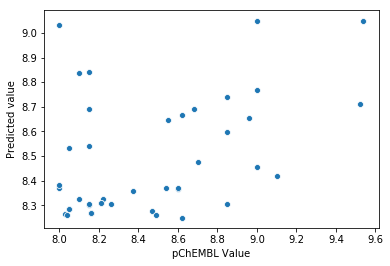

In [188]:
seaborn.scatterplot(x="pChEMBL Value", y="Predicted value", data=test)

In [189]:
score = r2_score(y_true=test["pChEMBL Value"], y_pred=test["Predicted value"])
score

0.1738365519163616

In [190]:
mse = mean_squared_error(y_true=test["pChEMBL Value"], y_pred=test["Predicted value"])
math.sqrt(mse)

0.3705986475037315

In [191]:
train["Predicted value"] = rfr.predict(list(train["FP2"]))

/home/anna/miniconda2/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


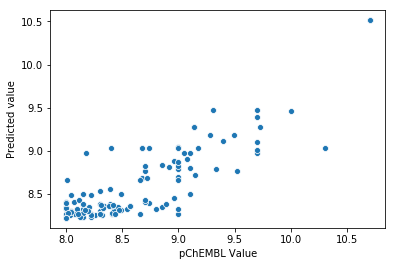

In [192]:
seaborn.scatterplot(x="pChEMBL Value", y="Predicted value", data=train)

In [193]:
score = r2_score(y_true=train["pChEMBL Value"], y_pred=train["Predicted value"])
mse = mean_squared_error(y_true=train["pChEMBL Value"], y_pred=train["Predicted value"])
score, math.sqrt(mse)

(0.7015107354854633, 0.31288121142262415)

## CV for best parameters

In [170]:
param_grid = {"n_estimators":[10, 25, 50, 100], "max_depth": [3,5,7,9]}
Xvalidator = GridSearchCV(RandomForestRegressor(), param_grid)

In [171]:
Xvalidator.fit(list(train["FP2"]), list(train["pChEMBL Value"]))

/home/anna/miniconda2/envs/pnl/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 25, 50, 100], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [172]:
Xvalidator.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [162]:
Xvalidator.predict(list(test["FP2"]))

array([8.2352    , 8.35353115, 8.2261    , 8.66024286, 8.58875   ,
       8.46749841, 8.6185    , 8.64073   , 8.8901    , 8.33012988,
       8.1896    , 8.33163   , 8.32943333, 8.57462143, 8.68056667,
       8.33012988, 8.66183333, 9.06521   , 8.27949333, 8.74655357,
       8.78015   , 8.24950909, 8.76804167, 8.51281667, 8.29943503,
       8.17151833, 8.2667    , 8.42364695, 8.97210903, 8.27525   ,
       8.90801667, 8.33163   , 8.38220452, 8.76727   , 8.29943503,
       8.3763    , 8.481315  , 8.4483685 , 9.06521   , 8.29943503,
       8.7386    , 8.2149    , 8.2451    , 8.29943503])

## Model for MQN 

In [194]:
rfr2 = RandomForestRegressor(n_estimators=25, max_depth=7)
rfr2.fit(list(train["MQN"]), list(train["pChEMBL Value"]))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [195]:
test["Predicted value2"] = rfr2.predict(list(test["MQN"]))
train["Predicted value2"] = rfr2.predict(list(train["MQN"]))

/home/anna/miniconda2/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/anna/miniconda2/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


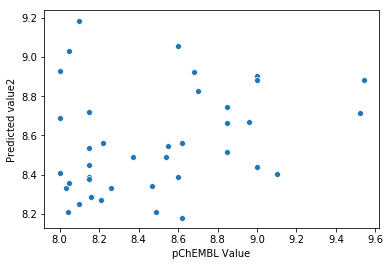

In [196]:
seaborn.scatterplot(x="pChEMBL Value", y="Predicted value2", data=test)

In [197]:
score = r2_score(y_true=test["pChEMBL Value"], y_pred=test["Predicted value2"])
mse = mean_squared_error(y_true=test["pChEMBL Value"], y_pred=test["Predicted value2"])
score, math.sqrt(mse)

(-0.044717906903321, 0.4167449646280206)

In [198]:
score = r2_score(y_true=train["pChEMBL Value"], y_pred=train["Predicted value2"])
mse = mean_squared_error(y_true=train["pChEMBL Value"], y_pred=train["Predicted value2"])
score, math.sqrt(mse)

(0.7252927596024243, 0.30015817739615247)